<a href="https://colab.research.google.com/github/AndrewHolm/acceleration-classification/blob/main/accel_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt


In [ ]:
not_moving = [-0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.03, 0.01, 0.01, 0.00, -0.03, -0.01, 0.00, 0.01, -0.00, -0.02, 0.00, 0.02, 0.01, -0.02, -0.02, 0.00, 0.00, -0.02, -0.03, -0.01, 0.00, -0.01, -0.02, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, 0.01, 0.01, -0.01, -0.03, -0.00, 0.01, 0.01, -0.01, -0.01, -0.01, -0.00, -0.02, -0.01, -0.00, 0.00, -0.01, -0.02, -0.02, 0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, 0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, 0.00, -0.01, -0.02, -0.02, 0.00, 0.00, 0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, 0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.03, 0.02, 0.00, -0.02, -0.01, -0.00, 0.00, 0.00, -0.04, -0.03, 0.00, 0.02, -0.01, -0.02, -0.01, -0.00, -0.01, -0.02, -0.01, 0.01, 0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, 0.00, 0.01, -0.01, -0.01, -0.01, 0.00, -0.01, -0.02, -0.02, 0.01, 0.00, -0.01, -0.01, -0.01, 0.00, 0.00, -0.01, -0.00, 0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, 0.00, 0.00, -0.01, -0.01, -0.01, 0.01, -0.00, -0.01, -0.01, 0.00, 0.00, -0.00, -0.01, -0.00, 0.00, -0.00, -0.01, -0.01, -0.00, 0.00, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, 0.01, 0.00, -0.01, -0.00, 0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, 0.00, -0.00, -0.02, -0.02, -0.01, -0.00, -0.02, -0.02, 0.00, 0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, 0.00, -0.00, -0.01, -0.01, 0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.03, 0.02, -0.01, -0.00, 0.03, 0.02, 0.03, -0.03, -0.05, -0.02, -0.01, -0.00, 0.00, 0.00, 0.00, -0.00, -0.01, -0.01, 0.00, 0.01, 0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.02, -0.02, -0.02, 0.04, 0.01, -0.03, -0.03, -0.01, -0.00, 0.00, -0.00, 0.00, 0.00, 0.00, -0.01, -0.00, -0.00, -0.00, 0.00, -0.01, -0.02, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, 0.00, 0.01, 0.01, -0.00, -0.01, -0.02, -0.01, 0.00, 0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, 0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.02, -0.01, 0.01, 0.03, -0.01, -0.03, -0.00, -0.03, -0.04, -0.01, 0.02, 0.00, -0.02, -0.02, -0.01, -0.01, -0.01, 0.01, 0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.02, -0.01, -0.00, -0.00, -0.01, 0.00, 0.00, -0.00, -0.01, 0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.02, -0.03, -0.02, 0.01, 0.01, 0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.02, 0.01, 0.01, 0.00, -0.01, -0.01, -0.00, 0.00, -0.03, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, 0.00, 0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, 0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, 0.00, 0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, 0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.05, 0.01, 0.04, 0.00, 0.00, 0.00, -0.02, 0.00, -0.01, -0.02, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, 0.00, 0.00, -0.02, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, -0.01, -0.02, 0.01, 0.02, 0.02, -0.01, 0.00, -0.04, 0.01, 0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, 0.00, -0.01, 0.00, -0.01, -0.01, -0.01, 0.00, 0.00, -0.02, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, 0.00, -0.00, -0.02, 0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, 0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, 0.00, -0.01, 0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.00, 0.00, -0.02, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.02, 0.00, -0.01, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, -0.01, 0.02, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.02, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, 0.00, -0.02, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.01, -0.02, -0.01, 0.00, -0.01, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, -0.02, 0.00, 0.10, -0.01, 0.08, -0.20, 0.05, 0.02, -0.02, -0.02, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01]

moving = [-0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.04, 0.23, 0.54, 0.01, -0.07, 0.21, -0.01, -0.06, 0.02, -0.10, -0.02, 0.10, -0.10, -0.03, 0.06, 0.01, -0.04, 0.02, 0.03, -0.05, -0.01, 0.03, 0.00, -0.01, -0.00, -0.00, -0.00, -0.02, -0.02, 0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.00, 0.00, -0.01, 0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, 0.33, 0.75, 0.08, -0.06, 0.30, 0.04, -0.16, 0.16, -0.21, -0.19, 0.13, -0.10, -0.12, 0.04, 0.05, -0.06, 0.03, 0.06, -0.07, -0.03, 0.03, 0.03, -0.02, 0.00, -0.01, -0.01, 0.00, -0.01, -0.02, 0.00, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, -0.01, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, 0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.86, 0.98, 0.75, -0.14, 0.10, 0.32, 0.00, 0.20, 0.11, -0.24, -0.14, 0.10, -0.11, -0.08, 0.05, -0.07, -0.04, 0.03, 0.05, -0.06, -0.02, 0.04, -0.02, -0.02, 0.00, -0.01, -0.01, -0.00, -0.01, -0.02, -0.00, -0.01, -0.01, -0.00, -0.00, 0.00, 0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, 0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.17, -0.98, 1.01, -0.60, -0.57, 0.17, 0.32, -0.03, 0.24, 0.00, -0.23, 0.16, 0.02, -0.14, -0.03, -0.01, -0.08, -0.02, 0.03, -0.04, -0.05, 0.00, 0.00, -0.03, -0.01, -0.01, -0.01, 0.00, -0.01, -0.01, 0.00, -0.00, -0.00, 0.00, -0.00, -0.00, 0.00, -0.01, -0.01, 0.00, -0.01, -0.01, -0.00, -0.00, -0.02, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.04, 0.86, 0.73, -0.19, -0.77, 0.33, -0.09, -0.11, 0.19, -0.19, -0.11, 0.13, 0.10, -0.09, 0.04, 0.02, -0.04, 0.03, 0.05, -0.02, -0.01, 0.03, 0.01, -0.03, 0.00, -0.01, -0.02, -0.00, -0.02, -0.01, 0.00, -0.01, -0.01, 0.00, 0.00, 0.00, 0.01, -0.00, -0.01, 0.00, -0.01, -0.02, -0.00, -0.02, -0.02, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, 0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.66, 0.76, 0.16, -0.90, -0.16, 0.06, -0.16, 0.12, -0.16, -0.17, 0.10, 0.14, -0.13, 0.01, 0.04, -0.05, 0.02, 0.06, -0.00, -0.06, 0.03, 0.03, -0.01, 0.00, -0.01, -0.02, -0.01, -0.01, -0.02, -0.01, -0.01, -0.01, -0.01, 0.00, 0.00, 0.00, -0.00, -0.01, 0.00, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.63, 0.46, 0.77, -0.91, -0.20, 0.34, 0.02, 0.14, 0.17, -0.18, -0.19, 0.15, -0.08, -0.12, 0.05, -0.04, -0.05, 0.02, -0.01, -0.05, -0.03, 0.02, -0.01, -0.02, 0.00, -0.00, -0.01, -0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, 0.00, -0.03, -0.01, -0.00, 0.00, -0.02, -0.00, 0.00, -0.02, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.71, 0.92, 0.75, -0.79, 0.24, 0.29, -0.20, 0.25, 0.21, -0.16, -0.15, 0.09, -0.11, -0.07, 0.06, -0.06, -0.04, 0.02, -0.03, -0.05, -0.03, 0.02, -0.02, -0.02, -0.00, 0.00, -0.00, -0.01, -0.01, 0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, 0.00, 0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.74, 0.32, -0.03, -0.99, -0.02, 0.41, -0.18, 0.19, 0.11, -0.15, 0.19, 0.13, -0.12, 0.04, 0.03, -0.05, -0.03, 0.03, -0.02, -0.06, -0.04, 0.03, -0.01, -0.02, -0.02, -0.03, 0.00, 0.01, -0.02, -0.00, 0.00, -0.02, -0.02, 0.03, 0.01, 0.00, -0.00, 0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.02, -0.03, -0.02, -0.00, -0.01, -0.00, -0.00, -0.01, 0.02, 0.00, -0.01, 0.01, -0.02, -0.01, -0.01, -0.02, -0.00, 0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.03, -0.86, 1.21, 0.60, -0.72, 0.36, 0.28, -0.20, 0.24, 0.07, -0.22, 0.14, 0.05, -0.11, -0.04, -0.02, -0.04, 0.00, 0.01, -0.02, -0.04, -0.02, 0.02, -0.01, -0.01, -0.01, -0.01, -0.01, 0.00, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.00, 0.01, -0.00, -0.01, 0.00, -0.01, -0.01, -0.00, -0.00, -0.02, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, 0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.44, 0.24, 0.88, -0.07, 0.01, 0.35, 0.09, -0.37, 0.24, -0.12, -0.23, 0.11, -0.10, -0.10, 0.06, -0.05, -0.02, 0.03, 0.02, -0.01, -0.02, -0.01, -0.00, -0.02, -0.01, -0.01, -0.01, 0.00, -0.00, -0.02, 0.00, -0.00, -0.01, 0.00, -0.01, -0.00, 0.00, -0.01, -0.01, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.67, 0.80, -0.21, -0.85, 0.23, -0.06, -0.25, 0.21, 0.17, -0.16, 0.11, 0.11, -0.10, 0.05, 0.01, -0.07, 0.04, 0.03, -0.03, -0.04, 0.02, 0.02, -0.02, -0.01, -0.01, -0.02, 0.00, -0.01, -0.01, -0.00, 0.00, -0.01, -0.00, 0.00, -0.00, 0.00, 0.00, -0.01, 0.00, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, -0.01, -0.01, 0.00, -0.00, -0.01, -0.00, -0.00, -0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, 0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, 0.00, -0.00, -0.00, -0.00, -0.00, 0.00, -0.00, -0.20, -0.49, 0.91, 0.16, -0.27, 0.37, 0.08, 0.09, 0.25, -0.07, -0.22, 0.15, -0.03, -0.12, 0.01, -0.04, -0.06, 0.01, 0.00, -0.04, -0.03, 0.01, -0.01, -0.02, 0.00, -0.02, -0.01, 0.00, -0.01, 0.00, -0.01, -0.01, -0.01, 0.00, -0.01, -0.00, 0.01, -0.01, -0.01, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, 0.00, -0.01, -0.01, -0.00, 0.00, -0.00, -0.01, -0.01, -0.00, 0.00, 0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.16, -0.71, 0.23, -0.70, -0.31, 0.11, -0.29, 0.08, 0.24, -0.23, 0.01, 0.15, -0.01, -0.01, 0.04, -0.03, -0.05, 0.03, 0.01, -0.03, -0.00, 0.03, 0.00, -0.02, -0.01, -0.02, -0.01, 0.00, -0.02, -0.01, 0.00, -0.01, -0.00, 0.00, -0.00, 0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, -0.02, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.22, -0.78, 0.87, -0.82, -0.45, 0.36, 0.06, 0.12, 0.26, -0.09, 0.02, 0.18, -0.02, -0.13, 0.05, -0.02, -0.04, 0.00, 0.01, -0.03, -0.05, 0.04, 0.00, -0.02, 0.00, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, -0.01, 0.02, 0.00, -0.01, -0.00, 0.00, -0.01, -0.01, 0.00, -0.01, -0.01, 0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.03, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.06, -0.91, 1.09, -0.44, -0.68, 0.32, 0.27, -0.11, 0.21, 0.09, -0.19, 0.14, 0.03, -0.13, 0.07, -0.01, -0.06, -0.01, 0.02, -0.03, -0.04, 0.03, 0.00, -0.02, 0.00, -0.02, -0.01, 0.00, -0.01, -0.01, 0.00, -0.01, -0.00, 0.00, -0.01, 0.00, 0.00, -0.01, -0.01, 0.00, -0.01, -0.01, -0.00, -0.02, -0.02, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.52, 0.17, 0.86, -0.97, -0.03, 0.41, -0.00, 0.17, 0.22, -0.14, 0.09, 0.15, -0.06, -0.12, 0.04, -0.05, -0.04, 0.02, -0.01, -0.04, -0.03, 0.01, -0.01, -0.02, 0.00, -0.02, 0.00, 0.01, -0.02, -0.00, 0.00, -0.01, -0.01, 0.00, 0.00, -0.00, 0.00, -0.01, -0.00, 0.00, -0.02, -0.01, 0.00, -0.02, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, 0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.53, 0.32, 0.64, -0.68, 0.02, 0.30, -0.15, 0.12, 0.11, -0.11, 0.10, 0.09, -0.10, 0.04, 0.03, -0.05, -0.05, 0.04, -0.01, -0.04, -0.02, 0.01, -0.01, -0.00, 0.00, -0.01, 0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, 0.00, -0.01, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.29, -0.15, 0.35, -0.81, -0.36, 0.04, -0.22, 0.10, 0.21, -0.20, 0.03, 0.14, -0.04, -0.00, 0.06, -0.03, 0.01, 0.03, -0.01, -0.03, 0.00, 0.02, -0.01, -0.01, -0.01, -0.02, 0.00, 0.00, -0.02, 0.00, 0.00, -0.01, 0.00, -0.00, -0.01, 0.01, 0.00, -0.01, 0.00, -0.01, -0.02, -0.01, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.50, 0.47, 0.13, -0.86, -0.12, 0.33, -0.24, 0.13, 0.16, -0.13, 0.10, 0.12, -0.10, 0.06, 0.05, -0.07, -0.02, 0.02, -0.03, -0.02, -0.01, 0.01, -0.00, -0.01, -0.02, -0.01, 0.00, -0.01, -0.01, 0.00, -0.01, -0.00, 0.00, -0.01, -0.01, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.72, 0.67, -0.14, -0.83, 0.30, -0.19, -0.10, 0.24, -0.20, -0.15, 0.12, -0.10, -0.08, 0.03, 0.02, -0.03, 0.02, 0.03, -0.02, -0.02, 0.02, 0.02, -0.01, 0.00, -0.01, -0.01, 0.00, -0.03, -0.01, 0.00, -0.01, -0.01, 0.00, -0.01, 0.00, 0.00, -0.00, -0.01, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.48, 0.75, -0.05, -0.71, 0.04, -0.11, -0.21, 0.14, 0.17, -0.14, 0.07, 0.10, -0.09, 0.03, 0.03, -0.04, 0.01, 0.03, -0.01, -0.04, 0.01, 0.01, -0.01, -0.00, -0.01, -0.01, 0.00, -0.02, -0.01, 0.00, -0.00, -0.01, 0.00, -0.00, -0.01, 0.00, -0.00, -0.01, 0.00, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, -0.01, -0.00, 0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.73, 0.79, 0.47, -0.31, 0.29, 0.19, -0.19, -0.02, 0.02, -0.18, -0.05, 0.03, -0.12, -0.05, 0.05, -0.05, -0.03, 0.02, 0.03, -0.03, -0.01, 0.02, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, 0.00, 0.00, -0.01, 0.00, 0.00, -0.01, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.20, -0.17, 0.56, 0.17, -0.13, 0.29, -0.00, 0.05, 0.16, -0.04, -0.13, 0.10, -0.07, -0.10, 0.02, -0.03, -0.06, -0.00, 0.03, -0.04, -0.03, 0.01, -0.01, -0.00, 0.00, -0.01, 0.01, -0.01, -0.02, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.01, -0.00, 0.00, 0.00, 0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, 1.25, 0.72, -0.63, 0.48, 0.25, -0.29, -0.22, 0.09, -0.22, -0.09, 0.15, -0.15, -0.07, 0.06, -0.05, -0.03, 0.03, 0.03, -0.04, -0.03, 0.02, 0.03, -0.02, -0.01, -0.01, -0.01, 0.00, -0.01, -0.02, -0.00, -0.01, 0.00, -0.02, -0.01, 0.00, 0.01, -0.01, -0.01, -0.01, -0.01, 0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.61, 0.75, 0.36, -0.42, 0.32, 0.13, -0.27, 0.15, -0.00, -0.14, 0.09, -0.01, -0.09, -0.01, -0.00, -0.04, -0.01, 0.02, -0.02, -0.02, -0.01, 0.01, -0.00, -0.01, -0.01, 0.00, -0.00, -0.02, -0.02, -0.00, -0.01, -0.01, 0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, 0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.32, 0.31, 0.81, 0.02, 0.04, 0.35, -0.06, -0.31, 0.13, -0.13, -0.13, 0.09, -0.08, -0.07, 0.01, -0.01, -0.02, 0.00, 0.01, -0.01, -0.02, 0.00, 0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.01, 0.00, -0.00, 0.00, 0.00, -0.01, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, 0.00, 0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.78, 0.98, 0.54, -0.49, 0.40, 0.24, -0.27, -0.13, 0.06, -0.21, -0.03, 0.02, -0.11, -0.02, 0.04, -0.04, -0.01, 0.02, 0.02, -0.02, -0.01, 0.02, 0.01, -0.01, -0.02, -0.01, 0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, 0.00, -0.01, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.39, 0.45, 0.92, -0.93, 0.10, 0.40, -0.38, 0.17, 0.16, -0.13, 0.09, 0.11, -0.08, -0.07, 0.01, -0.01, -0.02, 0.02, -0.01, 0.00, -0.03, 0.01, 0.01, -0.00, -0.02, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, 0.00, -0.00, -0.01, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.07, 0.67, 0.35, -0.49, 0.29, 0.11, -0.29, 0.09, -0.02, -0.13, 0.02, 0.09, -0.09, -0.01, 0.04, -0.03, -0.01, 0.01, 0.00, -0.02, -0.01, 0.00, 0.02, -0.01, -0.02, -0.00, -0.01, -0.02, -0.02, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, 0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.69, 0.93, 0.24, -0.78, 0.41, 0.09, -0.40, 0.14, -0.06, -0.18, 0.06, -0.02, -0.10, 0.01, 0.02, -0.04, 0.02, 0.02, 0.00, -0.02, -0.00, 0.01, 0.00, -0.01, -0.02, -0.01, 0.00, -0.01, -0.02, -0.00, -0.01, -0.01, 0.00, -0.00, -0.00, 0.00, 0.00, -0.01, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.04, -0.61, 0.64, -0.35, -0.50, 0.28, 0.18, 0.03, 0.15, 0.02, -0.01, 0.09, 0.00, -0.09, 0.04, -0.00, -0.04, 0.01, 0.00, -0.00, -0.02, 0.00, 0.02, 0.00, -0.01, 0.00, 0.00, -0.00, -0.02, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.51, 0.84, -0.16, -0.91, 0.31, 0.37, -0.34, 0.20, 0.13, -0.13, 0.11, 0.09, -0.09, 0.02, 0.03, -0.04, -0.03, 0.02, -0.00, -0.02, -0.03, 0.02, 0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, 0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.02, -0.80, 0.55, -0.51, -0.68, 0.38, -0.26, -0.12, 0.27, -0.20, 0.02, 0.11, 0.03, -0.03, 0.04, 0.00, -0.02, 0.01, 0.01, -0.01, -0.02, 0.01, 0.01, 0.00, -0.02, -0.01, 0.00, 0.00, -0.02, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.05, 0.98, 0.46, -0.64, -0.52, 0.19, -0.33, -0.01, 0.29, -0.21, 0.03, 0.11, 0.02, -0.02, 0.03, 0.02, -0.01, 0.01, 0.01, -0.01, -0.01, 0.00, 0.02, -0.00, -0.02, -0.01, -0.01, -0.01, -0.02, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, 0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.99, 0.93, 0.36, -0.89, 0.46, 0.14, -0.45, 0.26, -0.01, -0.25, 0.05, -0.03, -0.11, 0.01, -0.01, -0.03, -0.00, 0.01, -0.02, -0.03, -0.02, 0.03, -0.01, -0.02, -0.01, -0.01, -0.00, -0.01, -0.02, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, 0.00, -0.01, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, 0.20, 0.88, -0.08, -0.96, 0.39, -0.05, -0.39, 0.16, -0.15, -0.15, 0.10, -0.07, -0.08, 0.02, 0.03, -0.03, 0.01, 0.02, -0.02, -0.03, -0.00, 0.02, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, -0.00, -0.00, 0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.15, -1.01, 0.26, -0.90, -0.25, 0.09, -0.45, 0.11, 0.30, -0.22, 0.02, 0.16, -0.01, -0.02, 0.06, -0.02, -0.06, 0.05, 0.02, -0.03, -0.00, 0.03, -0.00, -0.02, -0.00, -0.02, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, 0.00, 0.00, -0.01, 0.00, -0.00, -0.02, -0.01, -0.01, -0.02, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.54, 0.79, 0.79, -0.19, 0.27, 0.36, -0.11, -0.34, 0.12, -0.14, -0.12, 0.10, -0.10, -0.10, 0.03, -0.04, -0.06, 0.04, 0.03, -0.02, -0.02, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.78, 0.81, -0.19, -0.88, 0.36, -0.10, -0.36, 0.14, -0.15, -0.12, 0.09, -0.08, -0.07, 0.02, 0.02, -0.02, 0.01, 0.02, -0.01, -0.02, 0.00, 0.02, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.10, 0.98, 0.35, -0.75, -0.41, 0.16, -0.40, 0.08, -0.00, -0.20, 0.02, 0.16, -0.14, -0.03, 0.06, -0.01, -0.01, 0.04, 0.02, -0.04, -0.00, 0.02, 0.00, -0.00, -0.01, -0.02, -0.01, -0.01, -0.02, 0.01, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, 0.00, -0.01, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, -0.01, -0.01, 0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.23, 0.90, 0.14, -0.86, -0.03, 0.04, -0.42, 0.15, 0.20, -0.19, 0.10, 0.12, -0.04, 0.00, 0.05, -0.03, 0.01, 0.04, 0.00, -0.04, 0.01, 0.03, -0.00, -0.01, -0.01, -0.02, -0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, 0.00, -0.00, 0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.81, 0.93, 0.47, -0.50, 0.35, 0.21, -0.29, -0.01, 0.05, -0.19, -0.03, 0.12, -0.12, -0.01, 0.05, -0.04, -0.01, 0.01, -0.02, -0.02, -0.01, 0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.02, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, -0.00, -0.01, 0.00, 0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, 0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.60, 0.92, 0.77, -0.95, 0.42, 0.38, -0.12, 0.23, 0.18, -0.20, -0.17, 0.13, -0.09, -0.12, 0.03, -0.05, -0.03, 0.02, -0.01, -0.04, -0.03, 0.01, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, -0.01, -0.02, 0.00, -0.01, -0.01, -0.00, -0.01, 0.00, 0.00, -0.01, -0.00, 0.00, -0.02, -0.01, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, 0.00, -0.01, -0.01, 0.00, 0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.02, -0.87, 0.92, -0.62, -0.68, 0.43, 0.22, -0.10, 0.30, 0.08, -0.21, 0.16, 0.07, -0.13, -0.07, 0.01, -0.06, -0.03, 0.03, -0.03, -0.04, -0.01, 0.01, -0.01, -0.01, -0.01, -0.01, 0.00, -0.00, -0.02, -0.01, -0.01, -0.01, 0.00, -0.01, -0.00, 0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.02, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.99, 0.67, -0.66, -0.75, 0.25, -0.27, -0.18, 0.10, -0.25, -0.11, 0.19, -0.15, -0.08, 0.06, -0.05, -0.03, 0.04, 0.04, -0.04, -0.02, 0.02, -0.02, -0.02, -0.01, -0.01, -0.00, 0.00, -0.02, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.98, 0.98, 0.44, -0.68, 0.48, 0.17, -0.34, 0.04, -0.00, -0.24, -0.03, 0.04, -0.16, -0.05, -0.00, -0.05, -0.01, 0.04, -0.04, -0.04, -0.01, 0.03, -0.02, -0.01, -0.00, -0.01, 0.00, -0.00, 0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.00, 0.00, -0.01, -0.01, 0.00, -0.00, -0.02, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, 0.00, -0.01, -0.02, 0.00, -0.01, 0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.58, 0.25, -0.26, -0.93, 0.22, 0.38, -0.32, 0.21, 0.20, -0.19, 0.12, 0.15, -0.09, 0.04, 0.05, -0.05, -0.04, 0.04, -0.01, -0.04, 0.01, 0.02, -0.01, -0.02, -0.01, -0.02, -0.01, -0.00, -0.02, -0.00, -0.00, -0.01, 0.00, -0.00, -0.00, 0.00, -0.00, -0.01, 0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.10, -0.98, 0.84, 0.39, -0.41, 0.44, 0.15, 0.08, 0.31, 0.02, -0.25, 0.17, 0.04, -0.14, -0.04, -0.01, -0.05, -0.01, 0.03, -0.03, -0.04, 0.03, 0.01, -0.02, -0.01, -0.02, -0.01, 0.00, -0.00, -0.01, 0.00, -0.00, -0.00, 0.00, 0.00, -0.00, 0.00, -0.01, -0.01, 0.00, -0.01, -0.01, -0.00, -0.02, -0.01, -0.01, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.59, 1.06, 0.76, -0.24, 0.30, 0.32, -0.11, 0.19, 0.15, -0.17, -0.15, 0.14, -0.08, -0.12, 0.01, -0.03, -0.04, 0.01, 0.04, -0.04, -0.03, 0.02, -0.01, -0.01, 0.00, -0.01, -0.01, 0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.58, 0.72, 0.76, -0.28, 0.37, 0.34, -0.11, -0.30, 0.10, -0.19, -0.06, 0.07, -0.11, -0.07, 0.02, -0.03, -0.02, 0.00, -0.01, -0.02, -0.03, 0.00, 0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, 0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.04, -0.89, 0.95, 0.51, -0.55, 0.41, 0.20, -0.04, 0.27, 0.02, -0.20, 0.13, -0.03, -0.13, 0.05, -0.00, -0.04, -0.01, 0.00, -0.02, -0.03, -0.01, 0.01, -0.00, -0.02, -0.00, 0.00, -0.00, -0.01, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, 0.03, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.72, 0.88, 0.66, -0.79, 0.39, 0.32, -0.07, 0.22, 0.09, -0.22, 0.11, 0.03, -0.12, -0.06, 0.01, -0.04, -0.02, 0.00, -0.01, -0.02, -0.02, 0.02, 0.01, -0.01, -0.01, 0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.00, 0.00, 0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.03, 0.97, 0.51, -0.60, -0.59, 0.20, -0.32, 0.01, 0.25, -0.21, 0.03, 0.12, -0.12, -0.03, 0.05, -0.00, -0.01, 0.01, 0.00, -0.02, -0.01, 0.01, 0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.86, 0.96, 0.51, -0.61, 0.40, 0.21, -0.31, 0.27, 0.03, -0.20, 0.02, 0.03, -0.11, -0.02, 0.02, -0.03, -0.01, 0.01, -0.02, -0.03, -0.02, 0.01, -0.01, -0.01, -0.01, 0.00, -0.00, -0.01, -0.01, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, 0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.19, -1.03, 0.19, -0.97, -0.15, 0.40, -0.45, 0.14, 0.30, -0.24, 0.12, 0.09, -0.05, 0.01, 0.05, -0.03, -0.03, 0.01, 0.00, -0.02, -0.03, 0.02, 0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.02, -0.00, 0.00, -0.01, -0.00, -0.00, -0.00, 0.00, 0.00, -0.01, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.21, -1.03, 0.93, -0.97, 0.09, 0.41, -0.45, 0.15, 0.27, -0.10, 0.12, 0.12, -0.06, -0.12, 0.01, -0.03, -0.03, 0.01, -0.00, -0.02, -0.03, 0.02, 0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.02, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.10, -0.97, 0.37, -0.76, -0.40, 0.40, -0.41, 0.07, 0.24, -0.02, 0.09, 0.13, -0.01, -0.01, 0.04, -0.02, -0.03, 0.01, 0.00, -0.02, -0.03, 0.02, 0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, 0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.25, -1.03, 0.09, -1.00, 0.10, 0.01, -0.44, 0.19, 0.24, -0.21, 0.14, 0.10, -0.06, 0.02, 0.01, -0.03, -0.03, 0.01, 0.00, -0.01, -0.01, 0.02, 0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.02, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, 0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.61, 0.73, -0.32, 0.41, 0.34, -0.08, -0.36, 0.12, -0.20, -0.13, 0.13, -0.10, -0.08, 0.02, 0.03, -0.01, 0.00, 0.01, -0.02, -0.03, 0.00, 0.02, -0.01, -0.02, -0.01, -0.00, -0.00, -0.01, -0.02, 0.03, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.59, 0.76, -0.31, -1.08, 0.44, -0.10, -0.38, 0.25, 0.12, -0.14, 0.15, 0.07, -0.08, 0.04, 0.03, -0.04, 0.00, 0.00, -0.01, -0.02, -0.00, 0.02, 0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, 0.00, -0.01, 0.00, -0.00, -0.01, 0.00, -0.00, -0.01, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.89, 0.78, -0.35, 0.41, 0.34, -0.11, -0.34, 0.12, -0.19, -0.11, 0.12, -0.11, -0.07, 0.04, 0.02, -0.02, 0.01, 0.01, -0.02, -0.03, 0.00, 0.02, -0.02, -0.02, -0.00, -0.01, -0.00, -0.02, -0.01, -0.00, -0.01, -0.01, 0.00, -0.01, -0.00, 0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.11, 0.79, 0.31, -0.88, -0.19, 0.12, -0.43, 0.10, -0.06, -0.22, 0.09, 0.10, -0.14, 0.00, 0.03, -0.02, 0.00, 0.01, 0.00, -0.02, -0.01, 0.02, 0.01, -0.02, -0.01, -0.01, -0.01, -0.02, -0.02, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, 0.00, 0.00, -0.01, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.81, 0.68, -0.58, -0.79, 0.31, -0.22, -0.19, 0.27, -0.22, 0.01, 0.12, 0.04, -0.05, 0.04, 0.00, -0.04, 0.01, 0.01, -0.01, -0.02, 0.01, 0.02, 0.00, -0.01, -0.01, -0.01, -0.01, -0.02, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, -0.01, -0.01, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -1.03, 1.03, 0.20, -0.98, 0.43, 0.07, -0.44, 0.16, -0.08, -0.20, 0.09, -0.04, -0.11, 0.01, 0.02, -0.03, 0.00, 0.00, -0.01, -0.03, -0.01, 0.02, -0.01, -0.02, -0.01, -0.01, 0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, 0.00, -0.01, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.83, 0.89, 0.05, -1.01, 0.38, 0.03, -0.42, 0.21, -0.12, -0.18, 0.10, -0.06, -0.10, 0.02, 0.02, -0.02, 0.00, 0.00, -0.00, -0.02, -0.02, 0.02, -0.01, -0.01, -0.01, -0.01, 0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, 0.00, 0.00, -0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, 0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.75, 0.37, 0.76, -1.04, 0.49, 0.36, -0.14, 0.30, 0.06, -0.21, -0.08, 0.04, -0.12, -0.05, -0.01, -0.04, -0.01, 0.01, -0.02, 0.00, -0.03, 0.02, 0.02, -0.01, -0.02, -0.01, -0.00, 0.00, -0.02, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.37, -0.76, 0.81, -0.00, 0.22, 0.39, 0.04, 0.24, 0.23, -0.12, -0.19, 0.10, -0.07, -0.11, 0.03, -0.04, -0.02, 0.00, 0.00, -0.00, -0.03, -0.01, 0.02, -0.01, -0.01, -0.01, -0.00, 0.00, -0.02, -0.02, -0.00, -0.02, -0.01, -0.00, -0.01, -0.00, 0.00, -0.00, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, 0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.69, 0.78, -0.42, -1.10, 0.45, -0.13, -0.35, 0.25, 0.12, -0.10, 0.13, 0.09, -0.08, 0.03, 0.01, -0.04, 0.00, 0.01, -0.00, -0.02, -0.00, 0.02, 0.01, -0.02, -0.01, -0.01, -0.00, -0.02, -0.02, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, 0.00, -0.00, -0.01, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.16, -1.02, 1.02, 0.38, -0.11, 0.44, 0.21, -0.41, 0.28, -0.05, -0.13, 0.02, -0.01, -0.12, -0.02, -0.00, -0.04, -0.01, 0.00, -0.01, -0.03, -0.02, 0.02, 0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, 0.00, -0.01, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, 0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.02, -0.89, 1.30, -0.66, -0.71, 0.45, 0.29, -0.11, 0.28, 0.02, -0.20, 0.13, 0.03, -0.13, 0.05, 0.00, -0.04, -0.01, 0.01, -0.01, -0.02, -0.02, 0.02, 0.01, -0.01, -0.02, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.13, -1.00, 0.44, -0.88, -0.12, 0.14, -0.40, 0.08, 0.27, -0.21, 0.06, 0.11, -0.12, -0.01, 0.03, -0.02, -0.00, 0.01, 0.01, -0.01, -0.02, 0.02, 0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, 0.00, 0.00, -0.01, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, 0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.80, 1.67, 0.78, -1.06, 0.47, 0.27, -0.20, 0.30, 0.05, -0.18, -0.06, 0.04, -0.12, -0.06, 0.05, -0.04, -0.01, 0.01, -0.01, -0.02, -0.03, 0.00, 0.01, -0.02, -0.01, -0.01, -0.00, -0.00, -0.01, -0.02, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.01, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.78, 1.70, 0.81, -0.49, 0.39, 0.36, -0.21, -0.35, 0.06, -0.19, -0.06, 0.01, -0.10, -0.06, 0.04, -0.04, -0.02, 0.00, 0.01, -0.02, -0.03, 0.00, 0.02, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.02, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.48, 0.73, -0.10, -1.07, 0.42, -0.02, -0.49, 0.22, -0.16, -0.13, 0.11, 0.09, -0.11, 0.03, 0.04, -0.02, 0.00, 0.01, 0.00, -0.03, -0.01, 0.02, 0.01, -0.02, -0.01, -0.01, -0.00, -0.01, -0.02, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.16, 1.17, 0.46, -0.91, -0.10, 0.16, -0.44, 0.06, -0.06, -0.15, 0.05, 0.13, -0.12, -0.02, 0.03, -0.03, 0.00, 0.01, 0.00, -0.02, -0.02, 0.01, 0.01, -0.02, -0.01, -0.01, -0.01, -0.01, -0.02, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, 0.00, 0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.70, 1.56, 0.81, -1.00, 0.38, 0.42, -0.13, 0.28, 0.15, -0.20, -0.05, 0.04, -0.11, -0.08, 0.03, -0.04, -0.01, 0.01, -0.01, -0.02, -0.03, 0.00, 0.01, -0.01, -0.02, -0.01, -0.01, -0.01, -0.02, -0.02, -0.00, -0.02, -0.01, -0.00, -0.01, -0.00, 0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.02, 1.33, 0.67, -0.69, 0.55, 0.31, -0.32, -0.25, 0.07, -0.23, -0.02, 0.14, -0.12, -0.03, 0.02, -0.06, -0.00, 0.01, 0.00, -0.02, -0.02, 0.00, 0.02, -0.01, -0.02, -0.01, -0.00, -0.00, -0.02, -0.02, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, -0.01, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.48, 0.73, -0.01, -1.03, 0.38, 0.04, -0.47, 0.21, -0.15, -0.10, 0.07, -0.06, -0.11, 0.01, 0.03, -0.03, 0.01, 0.01, -0.00, -0.02, -0.01, 0.02, -0.02, -0.01, -0.02, -0.01, 0.00, -0.02, -0.02, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, 0.00, 0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, 0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.13, -1.00, 0.34, -0.88, -0.21, 0.45, -0.45, 0.02, 0.28, -0.21, 0.07, 0.13, -0.03, -0.01, 0.04, -0.01, -0.04, 0.01, 0.00, -0.02, -0.03, 0.02, 0.02, -0.01, -0.01, -0.01, -0.00, 0.00, -0.02, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.12, -0.99, 1.10, 0.39, -0.33, 0.45, 0.17, -0.42, 0.28, -0.04, -0.23, 0.08, -0.00, -0.14, -0.02, -0.01, -0.04, -0.00, 0.01, -0.01, -0.02, -0.02, 0.01, 0.00, -0.01, -0.02, -0.01, 0.00, -0.01, -0.02, 0.00, -0.01, -0.02, -0.01, -0.00, -0.00, 0.00, 0.00, 0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, 0.00, 0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.50, 0.34, 0.77, -0.13, 0.23, 0.35, -0.03, 0.21, 0.21, -0.15, -0.10, 0.07, -0.08, -0.08, 0.01, -0.03, -0.02, 0.01, 0.01, -0.01, -0.03, -0.00, 0.01, -0.01, -0.02, -0.01, -0.00, -0.00, -0.02, -0.02, 0.00, -0.01, -0.01, 0.00, -0.01, -0.00, 0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.10, -0.99, 0.85, 0.30, -0.08, 0.38, 0.14, -0.42, 0.26, -0.07, -0.22, 0.08, -0.04, -0.13, 0.00, -0.03, -0.05, -0.00, 0.02, -0.02, -0.02, -0.00, 0.02, -0.01, -0.01, -0.01, -0.00, -0.00, -0.02, -0.02, 0.00, -0.02, -0.01, -0.00, -0.01, -0.01, 0.00, 0.00, -0.01, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.02, -0.90, 1.35, 0.71, -1.06, 0.49, 0.30, -0.30, 0.33, 0.04, -0.23, 0.15, 0.00, -0.12, -0.06, 0.01, -0.05, -0.00, 0.00, -0.01, -0.02, -0.02, 0.02, 0.01, -0.02, -0.02, -0.01, -0.01, -0.01, -0.02, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, 0.00, -0.01, -0.01, -0.01, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, 0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.76, 1.67, 0.83, -1.11, 0.44, 0.32, -0.40, 0.30, 0.14, -0.23, 0.12, 0.06, -0.12, 0.04, 0.01, -0.05, -0.01, 0.01, -0.01, -0.02, -0.03, 0.02, 0.01, -0.01, -0.02, -0.01, -0.01, -0.01, -0.02, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, 0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.36, -1.04, 0.92, -1.03, 0.29, 0.42, 0.04, 0.27, 0.30, -0.12, -0.20, 0.10, -0.03, -0.12, 0.01, -0.03, -0.03, 0.01, 0.00, -0.02, -0.03, 0.02, 0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.03, -0.91, 1.22, -0.72, -0.76, 0.49, -0.29, -0.23, 0.31, 0.00, -0.01, 0.15, 0.03, -0.12, 0.05, -0.01, -0.05, 0.01, 0.00, -0.01, -0.02, 0.00, 0.02, 0.00, -0.01, -0.01, -0.00, -0.00, -0.02, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.36, -0.52, 0.78, -1.03, 0.11, 0.37, 0.02, 0.21, 0.25, -0.11, -0.14, 0.11, -0.06, -0.09, 0.04, -0.04, -0.03, 0.01, -0.00, -0.02, -0.03, -0.01, 0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, -0.01, -0.01, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -1.04, 0.92, 0.24, -0.97, 0.45, 0.16, -0.49, 0.29, -0.09, -0.16, 0.04, -0.02, -0.11, 0.00, 0.04, -0.04, 0.01, 0.01, 0.00, -0.03, -0.02, 0.02, -0.01, -0.02, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.44, -0.12, -0.02, -1.05, 0.19, 0.39, -0.51, 0.22, 0.26, -0.13, 0.09, 0.09, -0.06, 0.01, 0.04, -0.04, -0.02, 0.01, -0.00, -0.02, -0.00, 0.02, 0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.02, -0.00, 0.00, -0.01, 0.00, -0.00, -0.01, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 1.23, 0.80, -0.30, -0.95, 0.37, -0.15, -0.41, 0.18, -0.21, -0.06, 0.11, -0.10, -0.08, 0.03, 0.02, -0.02, 0.01, 0.01, -0.00, -0.02, 0.00, 0.02, -0.01, -0.02, -0.01, -0.01, -0.01, -0.02, -0.02, 0.00, -0.01, -0.01, 0.00, 0.00, -0.00, 0.00, 0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.78, 0.69, -0.44, -0.84, 0.38, -0.20, -0.35, 0.25, -0.21, -0.04, 0.10, 0.07, -0.06, 0.03, 0.01, -0.05, 0.02, 0.01, -0.00, -0.03, 0.00, 0.02, 0.01, -0.02, -0.01, -0.00, -0.01, -0.02, -0.02, 0.00, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.28, -0.39, 0.76, -0.86, 0.06, 0.38, -0.44, 0.18, 0.23, -0.14, 0.09, 0.11, -0.06, -0.12, 0.05, -0.04, -0.04, 0.01, -0.00, -0.02, -0.02, 0.02, 0.01, -0.01, -0.02, -0.00, 0.00, -0.00, -0.02, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, 0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.63, 1.35, 0.82, -1.03, 0.34, 0.34, -0.12, 0.24, 0.20, -0.22, 0.11, 0.07, -0.07, -0.08, 0.02, -0.04, -0.01, 0.01, -0.00, -0.02, -0.03, 0.03, 0.01, -0.01, -0.02, -0.01, -0.00, -0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.46, -1.03, 0.90, -0.04, 0.11, 0.57, 0.09, -0.47, 0.34, -0.13, -0.24, 0.09, -0.03, -0.11, 0.01, -0.02, -0.04, 0.01, 0.01, -0.01, -0.03, -0.01, 0.02, -0.00, -0.02, -0.02, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, -0.00, 0.00, 0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, 0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.32, -0.64, 0.81, -0.98, 0.09, 0.35, -0.47, 0.19, 0.26, -0.12, 0.08, 0.11, -0.05, -0.10, 0.04, -0.04, -0.03, 0.01, 0.01, -0.01, -0.03, 0.02, 0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.02, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, 0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.08, 0.81, -0.14, 0.34, 0.44, 0.03, -0.51, 0.25, -0.17, -0.13, 0.07, -0.06, -0.09, 0.02, -0.04, -0.02, 0.01, 0.02, -0.02, -0.03, -0.01, 0.02, -0.01, -0.01, -0.01, -0.01, 0.00, -0.01, -0.02, 0.00, -0.01, -0.01, 0.00, -0.01, -0.00, 0.00, -0.00, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, 0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.88, 1.47, 0.85, -1.11, 0.54, 0.30, -0.21, 0.29, 0.04, -0.23, 0.14, 0.02, -0.10, -0.06, 0.00, -0.05, -0.00, 0.02, -0.01, -0.02, -0.03, 0.02, 0.01, -0.02, -0.02, -0.01, -0.00, -0.00, -0.02, 0.00, -0.00, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.31, -1.04, 0.99, 0.25, 0.11, 0.47, 0.13, -0.52, 0.33, -0.04, -0.17, 0.04, -0.02, -0.12, -0.01, -0.03, -0.03, 0.01, 0.01, -0.01, -0.03, -0.02, 0.02, -0.01, -0.02, -0.01, -0.01, -0.00, -0.01, -0.02, 0.00, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, 0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.65, 0.95, -0.28, -1.09, 0.31, 0.37, -0.50, 0.24, 0.20, -0.22, 0.12, 0.07, -0.08, 0.02, 0.00, -0.02, -0.01, 0.01, -0.00, -0.01, -0.03, 0.03, 0.01, -0.02, -0.01, -0.01, -0.01, 0.00, -0.02, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.02, 1.41, 0.74, -0.61, -0.83, 0.38, -0.25, -0.34, 0.09, -0.26, -0.02, 0.15, -0.11, -0.04, 0.04, -0.06, -0.01, 0.01, 0.00, -0.02, -0.03, 0.00, 0.02, -0.01, -0.02, -0.01, -0.00, -0.00, -0.02, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 1.77, 0.82, -0.42, -1.10, 0.35, -0.19, -0.44, 0.35, -0.24, -0.07, 0.13, 0.04, -0.05, 0.03, -0.01, -0.01, 0.01, 0.01, -0.01, -0.03, 0.00, 0.03, 0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.02, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.29, 0.81, -0.00, -0.91, 0.36, 0.00, -0.48, 0.22, -0.17, -0.12, 0.09, 0.10, -0.10, 0.01, 0.04, -0.02, 0.01, 0.01, -0.00, -0.03, -0.01, 0.02, 0.01, -0.02, -0.01, -0.01, -0.00, -0.01, -0.02, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.76, 0.85, 0.20, -0.98, 0.39, 0.08, -0.53, 0.17, -0.10, -0.18, 0.08, -0.03, -0.09, -0.00, -0.03, -0.03, 0.00, 0.01, -0.01, -0.03, -0.01, 0.02, -0.01, -0.02, -0.01, -0.01, -0.00, -0.01, -0.02, 0.00, -0.01, -0.01, -0.00, -0.00, 0.00, 0.00, 0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, 0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.03, 1.14, 0.56, -0.58, -0.68, 0.31, -0.34, -0.05, 0.27, -0.23, 0.01, 0.11, -0.12, -0.04, 0.03, -0.00, -0.01, 0.02, 0.01, -0.01, -0.02, 0.01, 0.02, 0.00, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, 0.00, 0.00, -0.00, -0.01, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.20, -1.02, 0.91, -0.92, -0.07, 0.40, 0.15, 0.11, 0.27, -0.07, -0.21, 0.12, -0.03, -0.11, -0.01, -0.03, -0.03, 0.01, 0.00, -0.01, -0.03, -0.01, 0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.02, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, -0.01, -0.01, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.19, -1.02, 0.31, -0.92, -0.03, 0.40, -0.50, 0.05, 0.28, -0.07, 0.10, 0.12, -0.03, -0.01, 0.03, -0.01, -0.03, 0.01, 0.00, -0.01, -0.03, 0.02, 0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.02, -0.01, 0.00, -0.01, -0.00, -0.00, -0.00, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.02, -0.89, 1.58, 0.70, -0.86, 0.43, 0.35, -0.28, 0.36, 0.08, -0.27, -0.02, 0.03, -0.11, -0.02, 0.01, -0.04, 0.00, 0.01, -0.01, -0.02, -0.03, 0.00, 0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, 0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.16, -1.02, 0.44, -0.88, -0.12, 0.45, -0.49, 0.15, 0.33, -0.25, 0.05, 0.13, 0.00, -0.02, 0.02, -0.01, -0.03, 0.01, 0.00, -0.01, -0.02, 0.01, 0.02, -0.00, -0.02, -0.01, -0.01, 0.00, -0.02, -0.01, -0.00, -0.01, -0.00, 0.00, -0.00, 0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.12, -0.99, 0.39, -0.77, -0.14, 0.38, -0.45, 0.03, 0.24, -0.05, 0.07, 0.12, -0.01, -0.02, 0.04, -0.01, -0.03, 0.01, 0.01, -0.01, -0.02, 0.01, 0.01, -0.01, -0.02, -0.01, -0.01, -0.00, -0.02, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.19, 1.22, 0.41, -0.87, -0.18, 0.22, -0.48, 0.05, 0.02, -0.19, 0.03, 0.13, -0.11, 0.00, 0.02, -0.00, 0.00, 0.02, 0.01, -0.01, -0.02, 0.01, 0.02, -0.01, -0.01, -0.01, -0.01, -0.01, -0.02, -0.01, -0.00, -0.01, -0.01, -0.00, 0.00, 0.00, 0.00, -0.01, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.10, -0.95, 0.58, -0.70, -0.40, 0.29, -0.38, -0.09, 0.35, -0.25, 0.02, 0.12, -0.00, -0.04, 0.02, -0.00, 0.02, 0.01, 0.01, -0.01, -0.02, 0.00, 0.02, 0.00, -0.02, -0.01, -0.01, -0.00, -0.02, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, 0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.69, 0.82, -0.29, -1.00, 0.34, -0.14, -0.46, 0.29, -0.24, -0.08, 0.11, 0.06, -0.08, 0.02, 0.02, -0.04, 0.01, 0.01, -0.00, -0.02, -0.00, 0.02, 0.01, -0.02, -0.01, -0.01, -0.01, -0.01, -0.02, -0.00, -0.00, -0.01, 0.00, -0.00, -0.00, 0.00, -0.00, -0.01, 0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.05, -0.90, 0.54, -0.61, -0.58, 0.39, -0.36, -0.04, 0.28, 0.05, 0.02, 0.10, 0.04, -0.03, 0.03, -0.01, -0.03, 0.01, 0.01, -0.01, -0.02, 0.01, 0.02, -0.00, -0.01, -0.01, -0.01, -0.00, -0.02, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, 0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.04, -0.93, 0.62, -0.66, -0.79, 0.43, -0.37, -0.16, 0.35, 0.08, -0.00, 0.13, 0.01, -0.11, 0.02, 0.01, -0.03, 0.01, 0.01, -0.01, -0.02, 0.01, 0.02, 0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, 0.00, 0.00, -0.00, -0.01, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.91, 1.23, 0.55, -0.57, 0.35, 0.31, -0.36, -0.04, 0.06, -0.22, 0.02, 0.10, -0.11, -0.05, 0.03, -0.03, -0.01, 0.00, 0.01, -0.02, -0.02, 0.01, 0.02, -0.01, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, 0.00, 0.00, -0.00, 0.00, 0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.69, 1.54, 0.79, -0.31, 0.32, 0.31, -0.19, -0.34, 0.16, -0.23, -0.06, 0.11, -0.08, -0.07, 0.01, -0.04, -0.01, 0.01, 0.01, -0.02, -0.03, -0.00, 0.02, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.41, 0.36, 0.10, -0.88, 0.06, 0.37, -0.49, 0.16, 0.21, -0.12, 0.06, 0.09, -0.03, -0.01, 0.04, -0.03, -0.03, 0.02, 0.01, -0.01, -0.02, 0.01, 0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.02, -0.01, -0.00, -0.01, -0.01, -0.00, 0.00, 0.00, 0.00, -0.01, 0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.60, 1.18, 0.80, -0.94, 0.24, 0.36, -0.11, 0.21, 0.13, -0.18, -0.07, 0.06, -0.07, -0.07, 0.03, -0.04, -0.02, 0.01, -0.00, -0.02, -0.03, -0.01, 0.01, -0.01, -0.02, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.04, -0.93, 0.63, -0.63, -0.79, 0.43, -0.39, -0.16, 0.32, 0.09, -0.00, 0.13, 0.01, -0.04, 0.03, 0.02, -0.05, 0.01, 0.01, -0.01, -0.01, 0.00, 0.02, 0.01, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, 0.00, -0.00, -0.01, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.19, -1.02, 0.86, 0.28, -0.09, 0.39, 0.13, 0.06, 0.29, -0.06, -0.20, 0.11, -0.04, -0.13, -0.00, -0.02, -0.03, 0.00, 0.01, -0.01, -0.03, -0.02, 0.02, -0.00, -0.01, -0.01, -0.01, 0.00, -0.01, -0.01, 0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, 0.00, -0.01, -0.00, -0.00, -0.01, 0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.79, 1.25, 0.70, -0.46, 0.33, 0.36, -0.29, -0.31, 0.12, -0.22, -0.11, 0.05, -0.09, -0.05, 0.06, -0.05, -0.02, 0.01, 0.00, -0.01, -0.03, -0.04, 0.05, -0.00, -0.04, 0.00, -0.01, -0.00, 0.00, -0.01, 0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, 0.00, -0.01, -0.01, -0.00, -0.00, -0.01, 0.00, -0.01, -0.02, 0.00, -0.07, 0.07, -0.06, -0.04, 0.02, -0.01, -0.02, -0.02, 0.02, -0.02, 0.02, -0.00, -0.02, -0.00, -0.00, -0.01, -0.00, 0.00, -0.01, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, -0.00, -0.00, -0.02, -0.97, 0.88, -0.82, -1.12, 0.66, -0.38, -0.47, 0.44, 0.15, -0.05, 0.19, -0.01, 0.02, 0.03, -0.03, -0.02, 0.04, 0.04, -0.02, 0.01, -0.01, 0.00, 0.04, -0.02, -0.01, -0.03, -0.00, -0.01, -0.01, -0.00, -0.01, -0.00, 0.00, 0.00, -0.01, -0.00, -0.00, 0.00, -0.00, -0.02, -0.01, 0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, 0.00, -0.00, -0.00, -0.01, -0.01, 0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.92, 1.60, -0.64, -1.11, 0.57, 0.24, -0.29, 0.42, 0.08, -0.30, 0.18, -0.00, -0.11, 0.03, -0.01, -0.04, 0.00, -0.01, 0.00, -0.00, -0.04, 0.02, 0.01, -0.01, -0.02, -0.01, -0.01, 0.00, -0.01, -0.00, 0.00, -0.01, -0.00, 0.00, 0.00, 0.00, -0.01, -0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, 0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.05, -0.96, 0.70, -0.68, -0.74, 0.48, -0.36, -0.07, 0.36, -0.25, -0.01, 0.12, 0.02, -0.02, 0.08, -0.00, -0.02, 0.01, 0.02, 0.01, -0.06, 0.00, 0.05, 0.02, -0.03, -0.02, -0.02, -0.01, -0.01, -0.02, -0.01, -0.01, -0.02, -0.01, 0.01, 0.00, -0.01, -0.02, -0.00, 0.00, -0.01, -0.01, 0.02, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.59, 0.98, 0.83, -0.25, 0.25, 0.32, -0.06, 0.27, 0.12, -0.18, -0.08, 0.07, -0.06, -0.08, 0.02, -0.03, -0.02, -0.01, 0.00, 0.00, -0.04, -0.02, 0.02, -0.01, -0.02, -0.00, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, 0.00, 0.00, -0.00, -0.00, -0.00, 0.00, 0.00, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, 0.00, 0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.64, 1.07, 0.78, -1.10, 0.38, 0.37, -0.05, 0.27, 0.15, -0.22, 0.11, 0.06, -0.08, -0.07, 0.00, -0.04, -0.01, -0.00, 0.00, 0.00, -0.04, 0.01, 0.02, -0.01, -0.02, -0.01, -0.01, 0.00, -0.01, -0.01, 0.00, -0.01, -0.01, 0.00, 0.00, -0.00, -0.01, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.01, -0.00, -0.00, 0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.67, 0.88, -0.35, -1.11, 0.41, 0.38, -0.50, 0.32, 0.19, -0.24, 0.13, 0.05, -0.08, 0.02, -0.01, -0.01, -0.01, -0.00, 0.00, 0.00, -0.01, 0.02, 0.02, -0.01, -0.01, -0.01, -0.01, 0.00, -0.02, -0.01, 0.00, -0.01, -0.01, 0.00, 0.00, -0.00, -0.01, -0.01, 0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.08, -0.98, 0.81, 0.63, -0.91, 0.51, 0.30, -0.39, 0.31, -0.09, -0.19, 0.14, -0.04, -0.12, 0.01, 0.00, -0.03, -0.00, -0.01, 0.00, -0.01, -0.05, -0.00, 0.01, -0.01, -0.02, -0.00, 0.00, -0.00, -0.01, -0.00, -0.00, -0.01, -0.01, 0.00, -0.00, -0.00, -0.01, -0.00, 0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.00, 0.00, -0.00, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.22, 0.81, 0.14, -0.79, -0.05, 0.08, -0.38, 0.12, 0.21, -0.10, 0.10, 0.06, -0.09, 0.01, 0.04, -0.02, -0.01, -0.00, 0.01, 0.00, -0.03, 0.01, 0.02, 0.00, -0.01, -0.01, -0.00, -0.01, -0.02, -0.01, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.03, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.16, 1.04, 0.35, -0.82, -0.11, 0.21, -0.42, 0.07, 0.26, -0.15, 0.07, 0.09, -0.11, -0.00, 0.06, -0.01, -0.00, -0.00, 0.00, 0.00, -0.04, 0.01, 0.02, 0.00, -0.02, -0.01, -0.00, -0.01, -0.02, -0.01, 0.00, -0.01, -0.01, -0.00, 0.00, -0.00, -0.00, -0.00, 0.03, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.01, -0.00, -0.00, -0.00, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.00, -0.01, -0.01, -0.01, -0.01, -0.00, -0.00, -0.01, -0.01, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.26, 0.75, 0.10, -0.96, 0.04, 0.16]

In [ ]:
# store data in NumPy array and reshape to be 120 1 second samples (50hz/samples)
not_moving_data = np.array(not_moving).reshape(120,100)
moving_data = np.array(moving).reshape(120,100)

from sklearn.preprocessing import StandardScaler
# Load the data
raw_data = np.concatenate((moving_data, not_moving_data), axis=0) # combine (240, 200)

# Normalize the data (zero mean and unit variance)
scaler = StandardScaler()
data = scaler.fit_transform(raw_data)

Epoch 1/10
6/6 [==============================] - 1s 66ms/step - loss: 0.6758 - accuracy: 0.5060 - val_loss: 0.6769 - val_accuracy: 0.4861
Epoch 2/10
6/6 [==============================] - 0s 34ms/step - loss: 0.6626 - accuracy: 0.5060 - val_loss: 0.6597 - val_accuracy: 0.4861
Epoch 3/10
6/6 [==============================] - 0s 36ms/step - loss: 0.6342 - accuracy: 0.5060 - val_loss: 0.4534 - val_accuracy: 0.4861
Epoch 4/10
6/6 [==============================] - 0s 36ms/step - loss: 0.4153 - accuracy: 0.5060 - val_loss: 0.3720 - val_accuracy: 0.4861
Epoch 5/10
6/6 [==============================] - 0s 36ms/step - loss: 0.3489 - accuracy: 0.5952 - val_loss: 0.3536 - val_accuracy: 0.9861
Epoch 6/10
6/6 [==============================] - 0s 37ms/step - loss: 0.3378 - accuracy: 0.9940 - val_loss: 0.3484 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 33ms/step - loss: 0.3334 - accuracy: 1.0000 - val_loss: 0.3440 - val_accuracy: 1.0000
Epoch 8/10
6/6 [===========

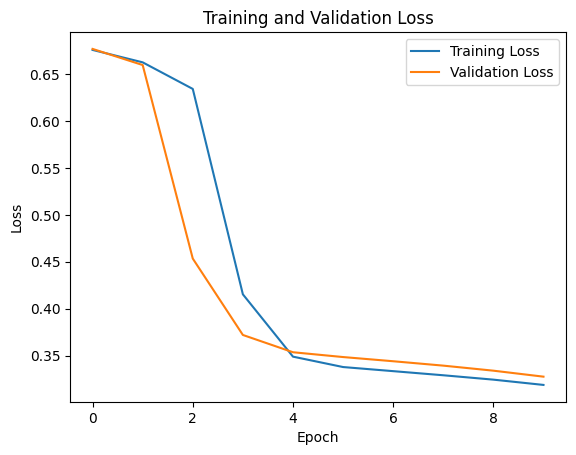

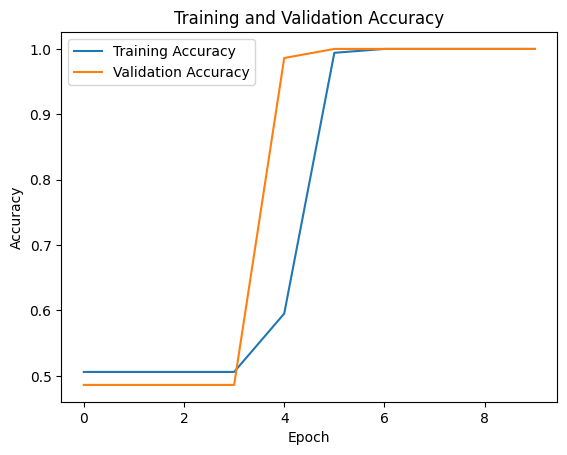

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Create labels for the data (0 = move, 1 = not)
num_samples, sample_rate = data.shape
labels = np.concatenate((np.zeros(num_samples//2), np.ones(num_samples//2)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(sample_rate, )),
    tf.keras.layers.Reshape((sample_rate, 1)),
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot the training and validation loss over time
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
print(raw_data[5])

[-0.   -0.   -0.   -0.   -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01
 -0.   -0.   -0.   -0.   -0.01 -0.01 -0.   -0.01 -0.01 -0.01 -0.66  0.76
  0.16 -0.9  -0.16  0.06 -0.16  0.12 -0.16 -0.17  0.1   0.14 -0.13  0.01
  0.04 -0.05  0.02  0.06 -0.   -0.06  0.03  0.03 -0.01  0.   -0.01 -0.02
 -0.01 -0.01 -0.02 -0.01 -0.01 -0.01 -0.01  0.    0.    0.   -0.   -0.01
  0.   -0.01 -0.01 -0.   -0.01 -0.02 -0.01 -0.01 -0.01 -0.   -0.   -0.
 -0.   -0.   -0.    0.   -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01
 -0.   -0.   -0.   -0.   -0.   -0.   -0.01 -0.01 -0.01 -0.01 -0.01 -0.01
 -0.01 -0.01 -0.   -0.  ]


In [ ]:
#finding arbitrary data point that has strong inference to test in arduino
print(not_moving_data[1])

scaler_test = StandardScaler()
data_test = scaler.fit_transform(raw_data)

print(raw_data[5])
new_test = data_test[5]

testt = new_test.reshape(-1, sample_rate, 1)

print(model.predict(testt))

[-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.   -0.   -0.   -0.01 -0.01
 -0.   -0.   -0.01 -0.01 -0.01 -0.   -0.   -0.   -0.01 -0.01 -0.01 -0.01
 -0.   -0.   -0.   -0.01 -0.01 -0.   -0.   -0.01 -0.01 -0.01 -0.01 -0.01
 -0.01 -0.01 -0.   -0.01 -0.01 -0.01 -0.01 -0.   -0.01 -0.01 -0.01 -0.
 -0.01 -0.01 -0.01 -0.01 -0.   -0.01 -0.01 -0.01 -0.01 -0.   -0.01 -0.01
 -0.01 -0.01 -0.   -0.01 -0.   -0.01 -0.01 -0.01 -0.   -0.01 -0.01 -0.01
 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.   -0.01 -0.01 -0.01
 -0.   -0.   -0.   -0.   -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01
 -0.01 -0.01 -0.01 -0.01]
[-0.   -0.   -0.   -0.   -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01
 -0.   -0.   -0.   -0.   -0.01 -0.01 -0.   -0.01 -0.01 -0.01 -0.66  0.76
  0.16 -0.9  -0.16  0.06 -0.16  0.12 -0.16 -0.17  0.1   0.14 -0.13  0.01
  0.04 -0.05  0.02  0.06 -0.   -0.06  0.03  0.03 -0.01  0.   -0.01 -0.02
 -0.01 -0.01 -0.02 -0.01 -0.01 -0.01 -0.01  0.    0.    0.   -0.   -0.01
  0.   -0.01 -0.01 -0.   -0

In [ ]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

# convert to a c header file 
!apt-get update && apt-get -qq install xxd
!xxd -i model.tflite > accel_model.h

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,351 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,252 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2,483 kB]
Get:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRele